# import all the neccessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [2]:
df = pd.read_csv('drug-overdose-death-rates new.csv')

In [3]:
df.head()

,Entity,Code,Year,Any opioid death rates (CDC WONDER),Cocaine overdose death rates (CDC WONDER),Heroin overdose death rates (CDC WONDER),Synthetic opioids death rates (CDC WONDER),Prescription Opioids death rates (US CDC WONDER)
0,United States,USA,1999,2.9,1.4,0.7,0.3,1.2
1,United States,USA,2000,3.0,1.3,0.7,0.3,1.3
2,United States,USA,2001,3.3,1.3,0.6,0.3,1.7
3,United States,USA,2002,4.1,1.6,0.7,0.4,2.3
4,United States,USA,2003,4.5,1.8,0.7,0.5,2.6


let's identify the data types

In [4]:
df.dtypes

Entity                                               object
Code                                                 object
Year                                                  int64
Any opioid death rates (CDC WONDER)                 float64
Cocaine overdose death rates (CDC WONDER)           float64
Heroin overdose death rates (CDC WONDER)            float64
Synthetic opioids death rates (CDC WONDER)          float64
Prescription Opioids death rates (US CDC WONDER)    float64
dtype: object

let's determine the shape, size
and columns too

In [5]:
print(df.size)
print(df.shape)
df.columns

176
(22, 8)


Index(['Entity', 'Code', 'Year', 'Any opioid death rates (CDC WONDER)',
       'Cocaine overdose death rates (CDC WONDER)',
       'Heroin overdose death rates (CDC WONDER)',
       'Synthetic opioids death rates (CDC WONDER)',
       'Prescription Opioids death rates (US CDC WONDER)'],
      dtype='object')

let's examine if there is NAN or duplicates

In [6]:
print(df.isnull().sum())
print(df.duplicated().sum())

Entity                                              0
Code                                                0
Year                                                0
Any opioid death rates (CDC WONDER)                 0
Cocaine overdose death rates (CDC WONDER)           0
Heroin overdose death rates (CDC WONDER)            0
Synthetic opioids death rates (CDC WONDER)          0
Prescription Opioids death rates (US CDC WONDER)    0
dtype: int64
0


so, we have no Nan and no duplicated data

# Let's check the descriptive stastistics

In [7]:
df.describe(include='all')

,Entity,Code,Year,Any opioid death rates (CDC WONDER),Cocaine overdose death rates (CDC WONDER),Heroin overdose death rates (CDC WONDER),Synthetic opioids death rates (CDC WONDER),Prescription Opioids death rates (US CDC WONDER)
count,22,22,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
unique,1,1,NaN,NaN,NaN,NaN,NaN,NaN
top,United States,USA,NaN,NaN,NaN,NaN,NaN,NaN
freq,22,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2009.500000,8.231818,2.350000,2.081818,3.145455,3.809091
std,NaN,NaN,6.493587,4.856747,1.351454,1.685692,4.716004,1.256567
min,NaN,NaN,1999.000000,2.900000,1.300000,0.600000,0.300000,1.200000
25%,NaN,NaN,2004.250000,4.800000,1.425000,0.700000,0.600000,2.975000
50%,NaN,NaN,2009.500000,6.700000,1.750000,1.050000,0.850000,4.350000
75%,NaN,NaN,2014.750000,10.050000,2.425000,3.925000,2.775000,4.675000


## let's dive deep into the visuals

# Plotting trends over the years

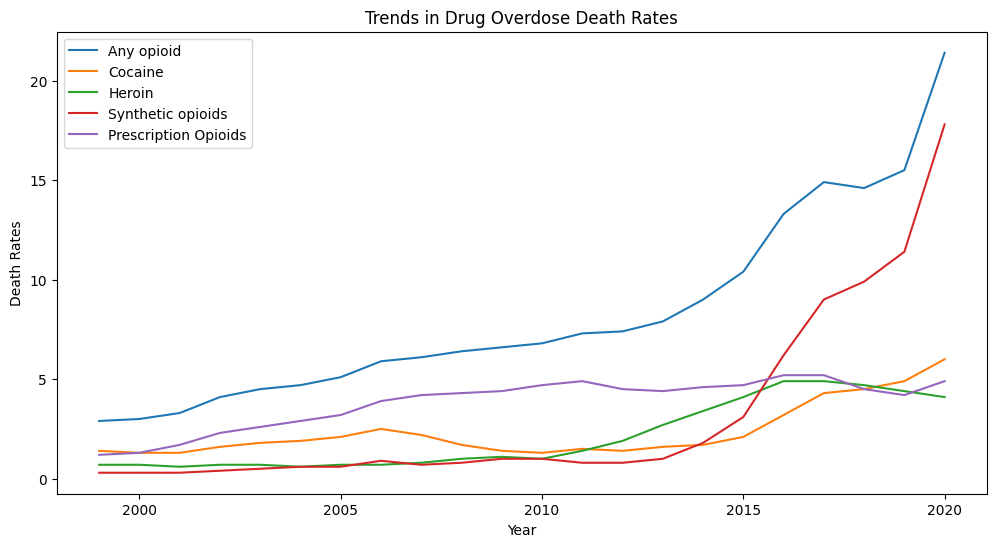

In [8]:
# Plotting trends over the years
plt.figure(figsize=(12, 6))

# Plotting each drug overdose death rate
plt.plot(df['Year'], df['Any opioid death rates (CDC WONDER)'], label='Any opioid')
plt.plot(df['Year'], df['Cocaine overdose death rates (CDC WONDER)'], label='Cocaine')
plt.plot(df['Year'], df['Heroin overdose death rates (CDC WONDER)'], label='Heroin')
plt.plot(df['Year'], df['Synthetic opioids death rates (CDC WONDER)'], label='Synthetic opioids')
plt.plot(df['Year'], df['Prescription Opioids death rates (US CDC WONDER)'], label='Prescription Opioids')

plt.xlabel('Year')
plt.ylabel('Death Rates')
plt.title('Trends in Drug Overdose Death Rates')
plt.legend()
plt.show()

# Bar Chart
This visualization compares the death rates for different types of drugs in a specific year.

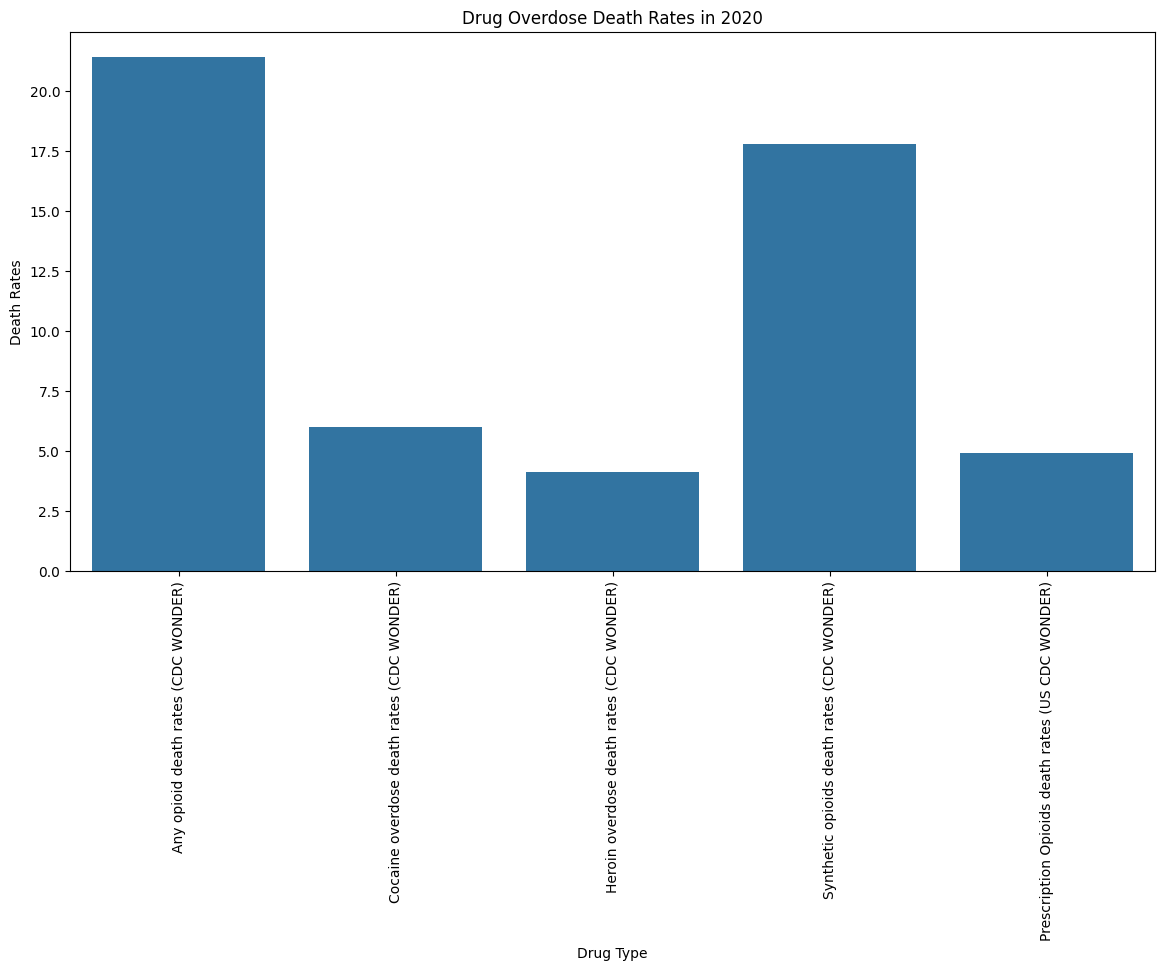

In [9]:
# Filtering data for a specific year, e.g., 2020
year_data = df[df['Year'] == 2020]

# Reshape the data for seaborn
year_data_melted = year_data.melt(id_vars=['Year'], value_vars=['Any opioid death rates (CDC WONDER)',
                                                               'Cocaine overdose death rates (CDC WONDER)',
                                                               'Heroin overdose death rates (CDC WONDER)',
                                                               'Synthetic opioids death rates (CDC WONDER)',
                                                               'Prescription Opioids death rates (US CDC WONDER)'],
                                  var_name='Drug Type', value_name='Death Rates')

# Plotting a bar chart for different drug types in the year 2020
plt.figure(figsize=(14, 7))
sns.barplot(x='Drug Type', y='Death Rates', data=year_data_melted)
plt.xticks(rotation=90)
plt.xlabel('Drug Type')
plt.ylabel('Death Rates')
plt.title('Drug Overdose Death Rates in 2020')
plt.show()

# Stacked Bar Chart
This visualization shows the composition of death rates from different drugs over the years.

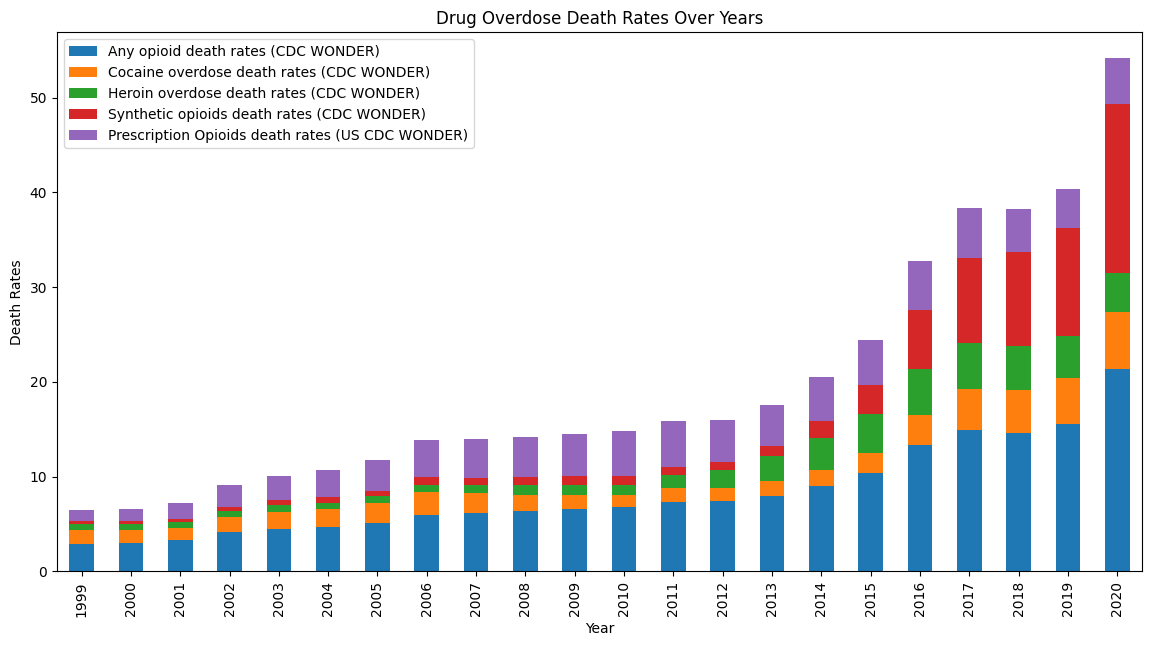

In [10]:
# Reshape the data for plotting
stacked_data = df.set_index('Year')[['Any opioid death rates (CDC WONDER)',
                                       'Cocaine overdose death rates (CDC WONDER)',
                                       'Heroin overdose death rates (CDC WONDER)',
                                       'Synthetic opioids death rates (CDC WONDER)',
                                       'Prescription Opioids death rates (US CDC WONDER)']]

# Creating a stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.xlabel('Year')
plt.ylabel('Death Rates')
plt.title('Drug Overdose Death Rates Over Years')
plt.legend(loc='upper left')
plt.show()


# Heatmap
This visualization shows the intensity of death rates across different years.

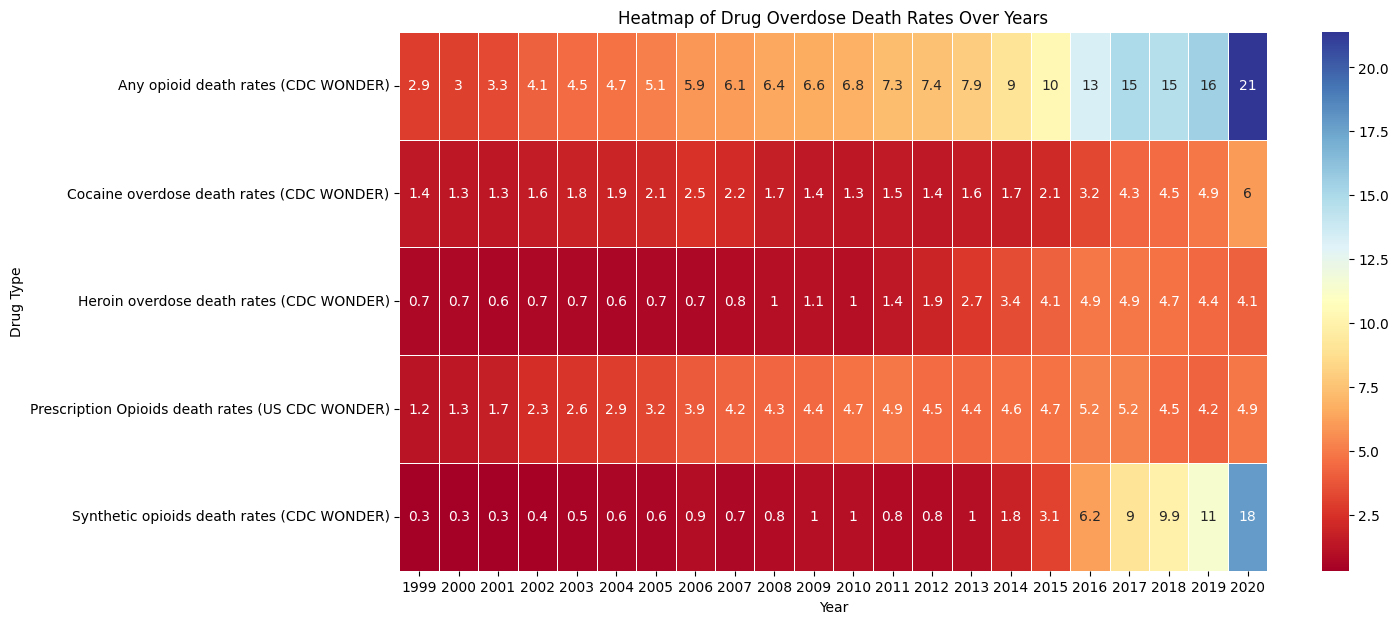

In [12]:
pivot_table = df.pivot_table(index='Year', values=['Any opioid death rates (CDC WONDER)',
                                                     'Cocaine overdose death rates (CDC WONDER)',
                                                     'Heroin overdose death rates (CDC WONDER)',
                                                     'Synthetic opioids death rates (CDC WONDER)',
                                                     'Prescription Opioids death rates (US CDC WONDER)'])

# Plotting the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table.T, annot=True, cmap='RdYlBu', linewidths=.5)
plt.title('Heatmap of Drug Overdose Death Rates Over Years')
plt.ylabel('Drug Type')
plt.xlabel('Year')
plt.show()


# Box Plot
This visualization shows the distribution of death rates for each drug type over the years.

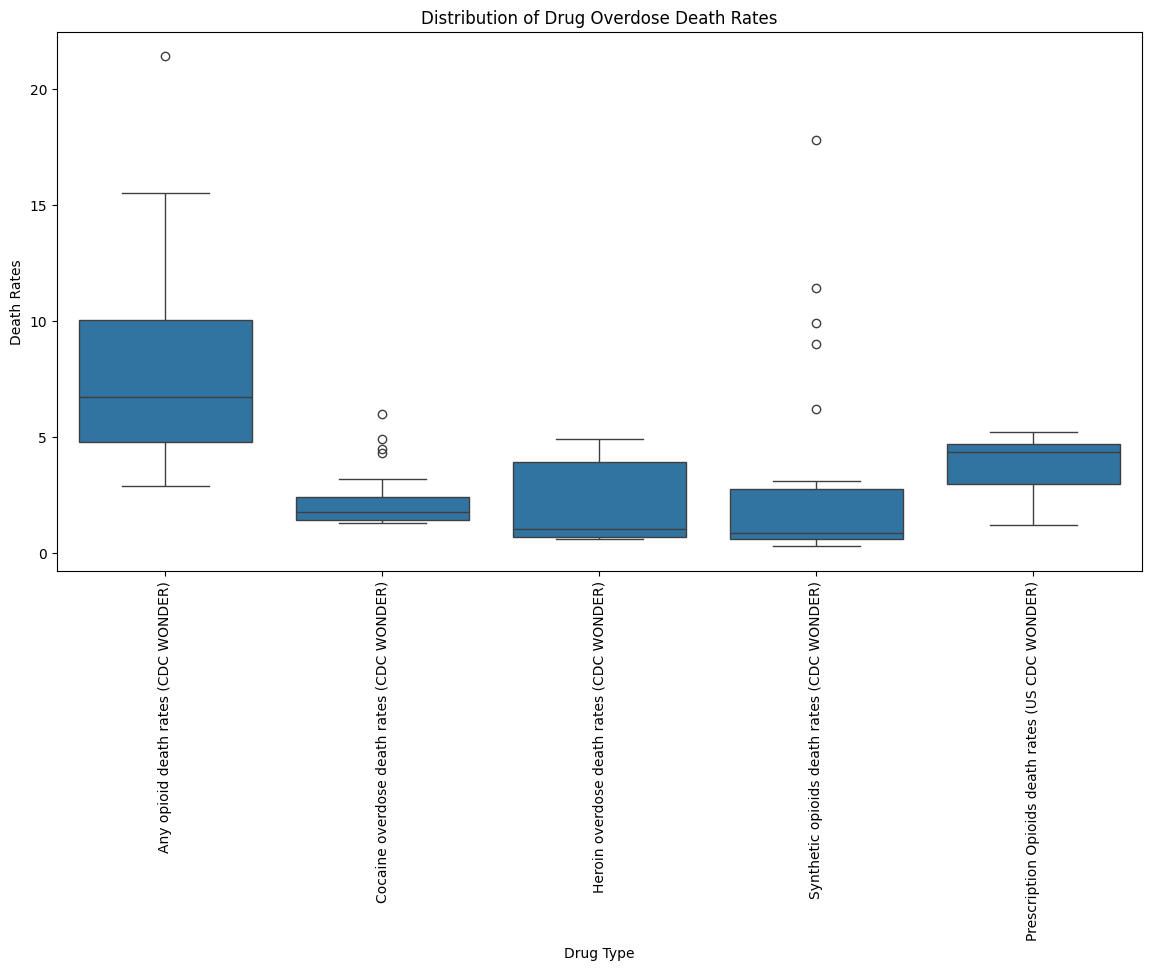

In [13]:
# Reshape the data for seaborn
melted_data = df.melt(id_vars=['Year'], value_vars=['Any opioid death rates (CDC WONDER)',
                                                      'Cocaine overdose death rates (CDC WONDER)',
                                                      'Heroin overdose death rates (CDC WONDER)',
                                                      'Synthetic opioids death rates (CDC WONDER)',
                                                      'Prescription Opioids death rates (US CDC WONDER)'],
                        var_name='Drug Type', value_name='Death Rates')

# Creating a box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Drug Type', y='Death Rates', data=melted_data)
plt.xlabel('Drug Type')
plt.ylabel('Death Rates')
plt.title('Distribution of Drug Overdose Death Rates')
plt.xticks(rotation=90)
plt.show()


# Scatter Plot
This visualization identifies correlations between different drug overdose death rates.

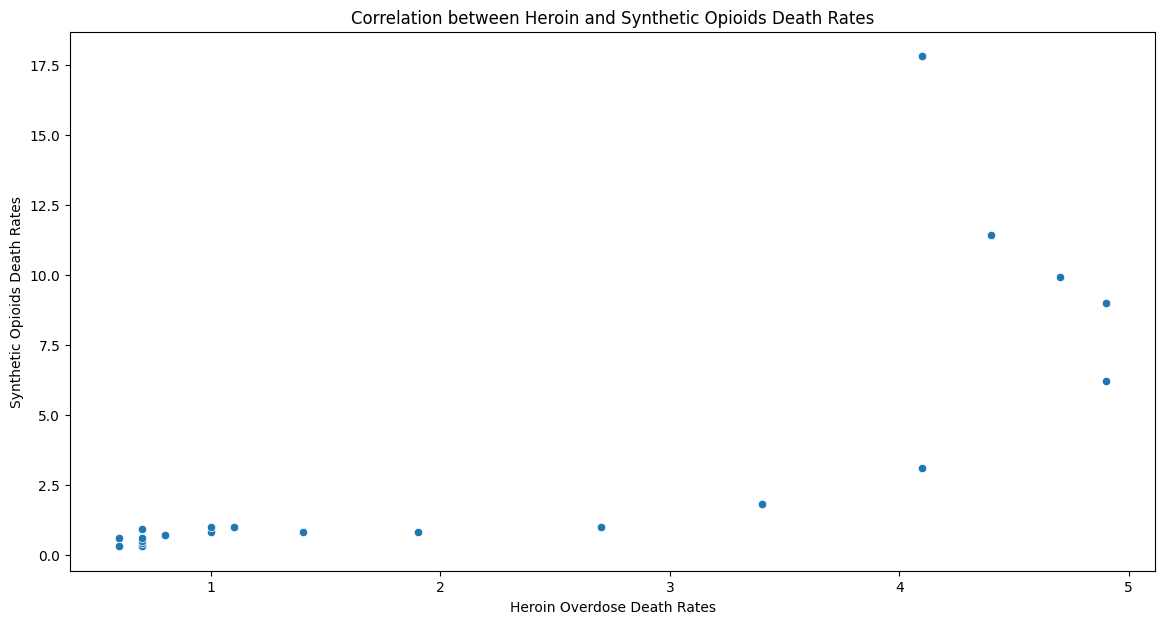

In [14]:
# Creating a scatter plot between heroin and synthetic opioids death rates
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Heroin overdose death rates (CDC WONDER)', y='Synthetic opioids death rates (CDC WONDER)', data=df)
plt.xlabel('Heroin Overdose Death Rates')
plt.ylabel('Synthetic Opioids Death Rates')
plt.title('Correlation between Heroin and Synthetic Opioids Death Rates')
plt.show()


let's look at the correlation of the drugs

                                                  Any opioid death rates (CDC WONDER)  \
Any opioid death rates (CDC WONDER)                                          1.000000   
Cocaine overdose death rates (CDC WONDER)                                    0.913143   
Heroin overdose death rates (CDC WONDER)                                     0.887371   
Synthetic opioids death rates (CDC WONDER)                                   0.951798   
Prescription Opioids death rates (US CDC WONDER)                             0.685113   

                                                  Cocaine overdose death rates (CDC WONDER)  \
Any opioid death rates (CDC WONDER)                                                0.913143   
Cocaine overdose death rates (CDC WONDER)                                          1.000000   
Heroin overdose death rates (CDC WONDER)                                           0.744343   
Synthetic opioids death rates (CDC WONDER)                                         0.

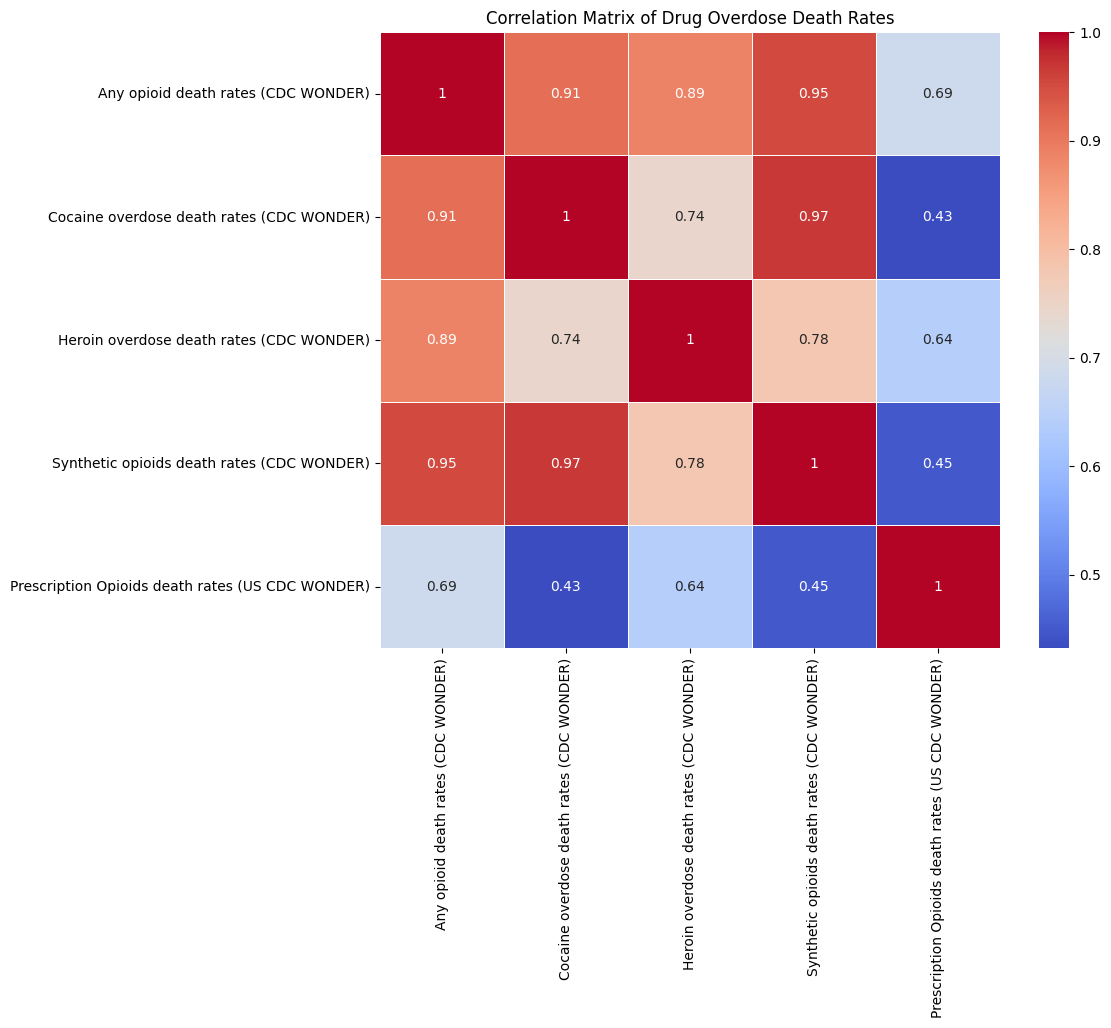

In [15]:
# Selecting the relevant columns
selected_columns = df[['Any opioid death rates (CDC WONDER)',
                         'Cocaine overdose death rates (CDC WONDER)',
                         'Heroin overdose death rates (CDC WONDER)',
                         'Synthetic opioids death rates (CDC WONDER)',
                         'Prescription Opioids death rates (US CDC WONDER)']]

# Computing the correlation matrix
correlation_matrix = selected_columns.corr()

# Displaying the correlation matrix
print(correlation_matrix)

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Drug Overdose Death Rates')
plt.show()
